<a href="https://colab.research.google.com/github/Awutaan/Intan_PCVK_Genap_23/blob/main/week3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


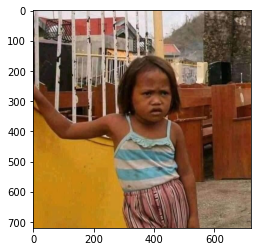

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PC/2.jpg')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai Kecerahan: 50


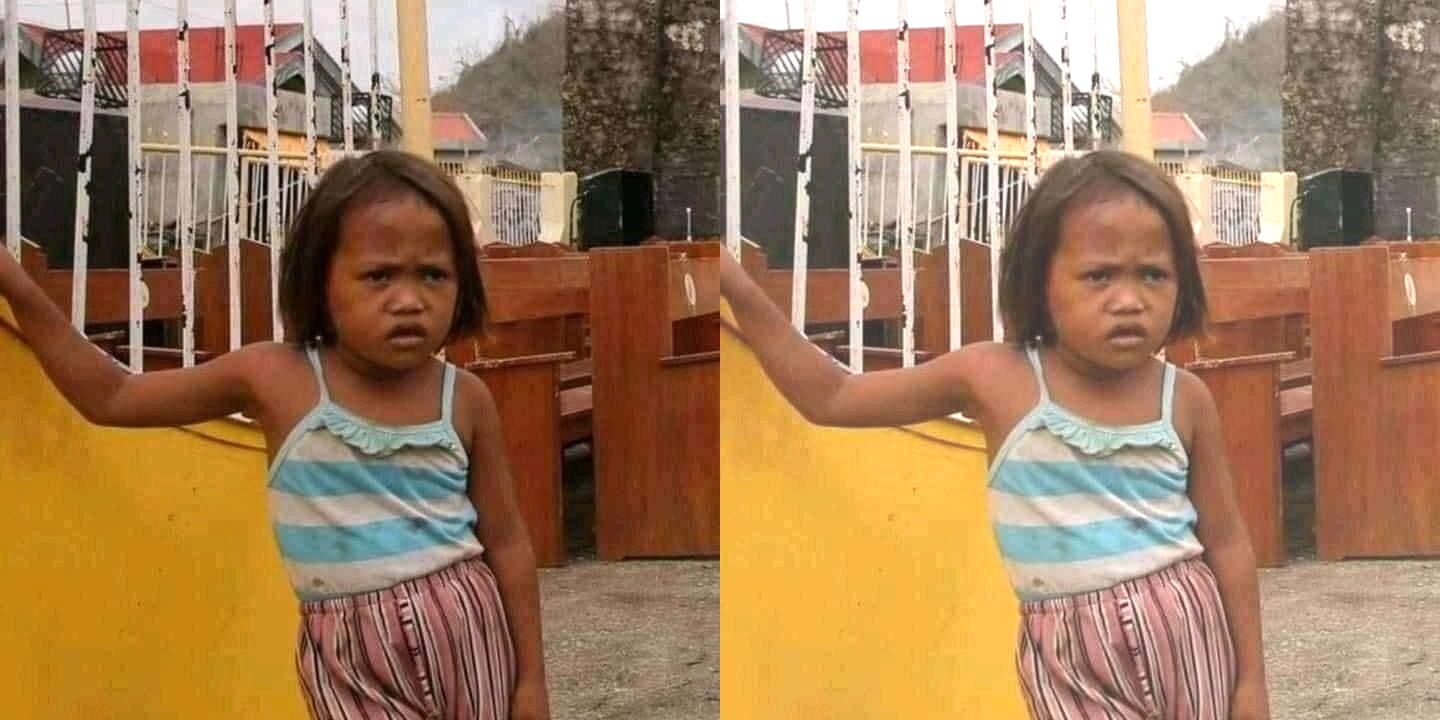

In [ ]:

print(' Mengubah tingkat kecerahan citra ') 
print('----------------------------------') 
try: 
  brightness = int(input('Masukkan nilai Kecerahan: ')) 
except ValueError: 
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PC/2.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

In [ ]:
#Implementasikan transformasi contrast pada Google Colaboratory menggunakan

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255] : 60
Masukkan kontras [1.0 - 3.0] : 1.5


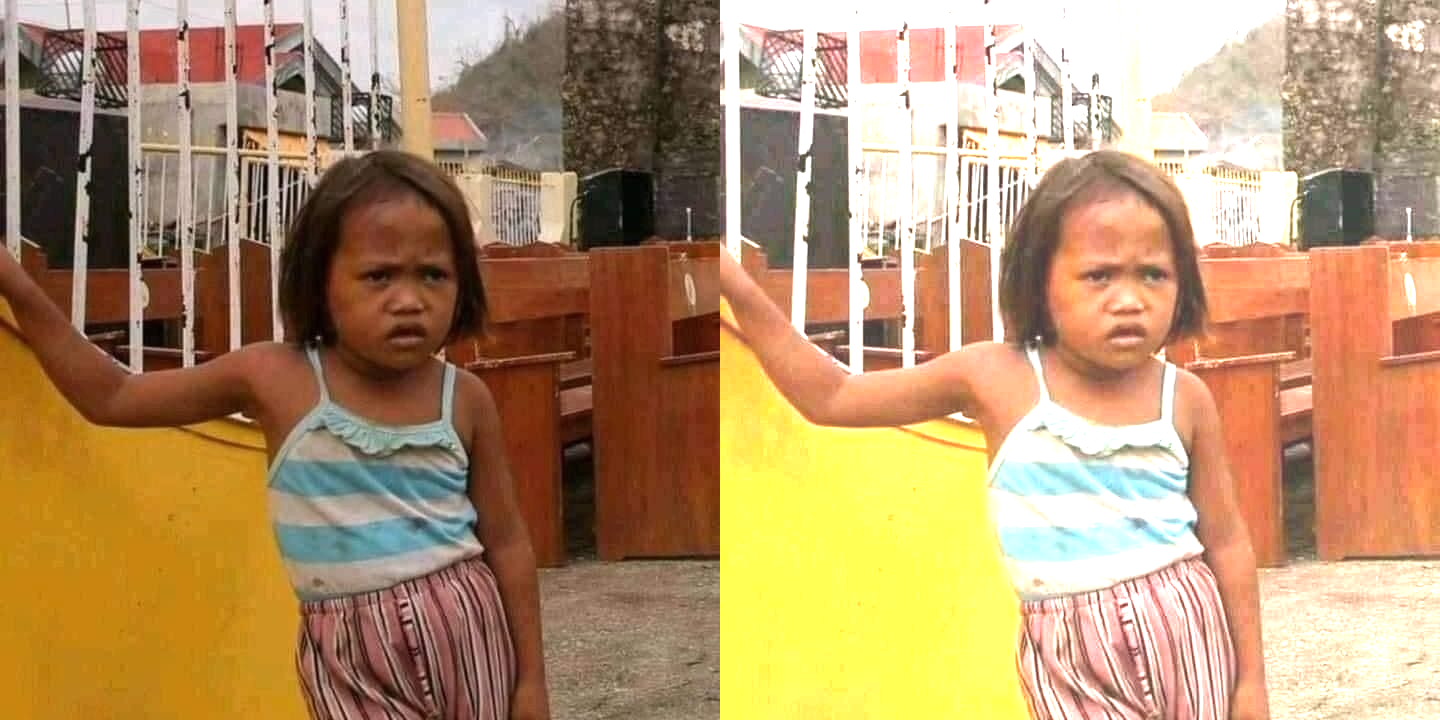

In [ ]:
# Tugas 1
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255] : '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PC/2.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

In [ ]:
#Implementasikan transformasi logarithmic brightness pada Google Colaboratory

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------
Masukkan tingkat kecerahan : 40


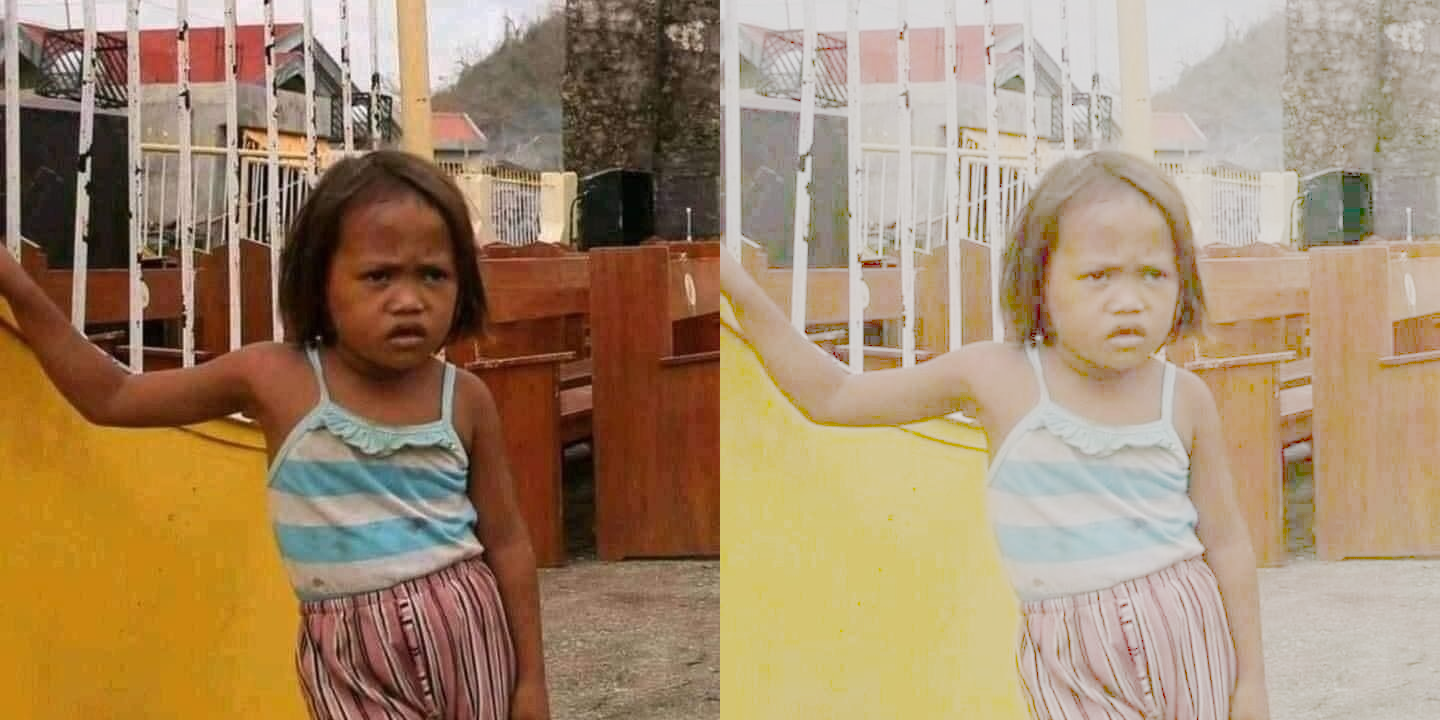

In [ ]:
# Tugas 2 
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan : '))
except ValueError:
  print('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

In [ ]:
#Implementasikan transformasi grayscale menggunakan metode averaging, lightness,

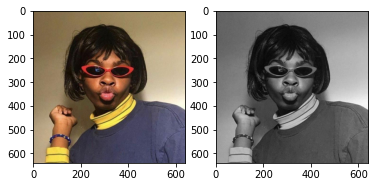

In [ ]:
#Averaging

original = cv.imread('/content/drive/MyDrive/PC/1.jpg')
color_image = cv.cvtColor(original,cv.COLOR_BGR2RGB)

average_img = np.average(color_image, axis=2)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_image)
axarr[1].imshow(average_img, cmap='gray')

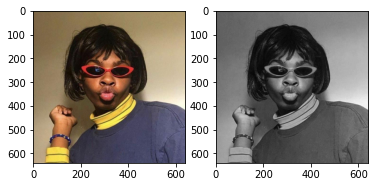

In [ ]:
#Lightness

original = cv.imread('/content/drive/MyDrive/PC/1.jpg')
color_image = cv.cvtColor(original,cv.COLOR_BGR2RGB)

R, G, B = color_image[:,:,0], color_image[:,:,1], color_image[:,:,2]
max_ch = np.maximum(np.maximum(R, G), B)
min_ch = np.minimum(np.minimum(R, G), B)

lightness_img = max_ch/2 + min_ch/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_image)
axarr[1].imshow(lightness_img, cmap='gray')

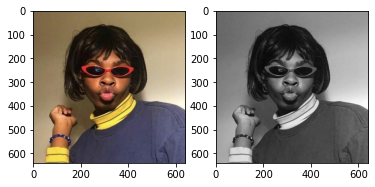

In [ ]:
#Luminance

original = cv.imread('/content/drive/MyDrive/PC/1.jpg')
color_image = cv.cvtColor(original,cv.COLOR_BGR2RGB)

R, G, B = color_image[:,:,0], color_image[:,:,1], color_image[:,:,2]

luminance_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_image)
axarr[1].imshow(luminance_img, cmap='gray')

In [ ]:
#Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. 

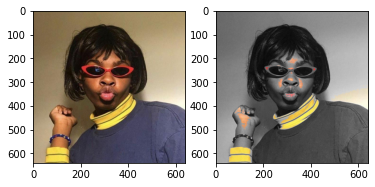

In [ ]:
original = cv.imread('/content/drive/MyDrive/PC/1.jpg')
color_image = cv.cvtColor(original,cv.COLOR_BGR2RGB)
c_red, r_mask = cv.threshold(original[:,:,2], 225, 255, cv.THRESH_BINARY)

#Selection Mask Color Red
mask = np.zeros_like(original)
mask[:,:,0] = r_mask
mask[:,:,1] = r_mask
mask[:,:,2] = r_mask

c_red = cv.bitwise_and(color_image, mask)

#BG Gray with Red Mask
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
color_img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
bg_gray = cv.bitwise_and(color_img, 255 - mask)

#Result
result = bg_gray + c_red

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_image)
axarr[1].imshow(result, cmap='gray')